In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from prototypes.ocn_only.R1.config import OcnTrainer as Emulator 
from graphufs.stacked_utils import get_channel_index
from graphufs.datasets import Dataset

In [2]:
_scratch = "/pscratch/sd/n/nagarwal"
_prototype = "ocn-only"
_expt = "R1"

In [3]:
replay_gcs = "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.zarr"
ocn_gcs = xr.open_zarr(replay_gcs, storage_options={"token":"anon"})
ocn_gcs

<xarray.Dataset> Size: 5TB
Dimensions:       (time: 43826, lat: 192, lon: 384, zl: 75, z_l: 75)
Coordinates:
    cftime        (time) object 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
    ftime         (time) timedelta64[ns] 351kB dask.array<chunksize=(21913,), meta=np.ndarray>
  * lat           (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lon           (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time          (time) datetime64[ns] 351kB 1993-12-31T18:00:00 ... 2023-12-31
  * z_l           (z_l) float64 600B 0.5154 1.571 2.687 ... 5.698e+03 5.902e+03
  * zl            (zl) float64 600B 1.0 3.0 5.0 ... 3.591e+03 5.111e+03
Data variables: (12/20)
    Heat_PmE      (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    LwLatSens     (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SSH           (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    SW            (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    evap          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    ...            ...
    so            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    taux          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    tauy          (time, lat, lon) float32 13GB dask.array<chunksize=(1, 192, 384), meta=np.ndarray>
    temp          (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    uo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
    vo            (time, z_l, lat, lon) float32 969GB dask.array<chunksize=(1, 75, 192, 384), meta=np.ndarray>
Attributes:
    abstract:         The NOAA Unified Forecast System (UFS) / Global Ensembl...
    acknowledgement:  To provide appropriate attribution under this license, ...
    description:      This zarr store is a subset of the original GEFSv13 UFS...
    license:          The Global Ensemble Forecast System version 13 (GEFSv13...

In [4]:
inputs = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "inputs.zarr"))
targets = xr.open_zarr(os.path.join(_scratch, _prototype, _expt, "training", "targets.zarr"))

In [5]:
targets

<xarray.Dataset> Size: 963GB
Dimensions:   (channels: 43, lat: 192, lon: 384, sample: 37983)
Coordinates:
  * channels  (channels) int64 344B 0 1 2 3 4 5 6 7 ... 35 36 37 38 39 40 41 42
  * lat       (lat) float64 2kB 89.82 88.89 87.95 87.01 ... -87.25 -88.18 -89.12
  * lon       (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * sample    (sample) int64 304kB 0 1 2 3 4 5 ... 37978 37979 37980 37981 37982
Data variables:
    targets   (sample, lat, lon, channels) float64 963GB dask.array<chunksize=(1, 192, 384, 32), meta=np.ndarray>

In [6]:
em = Emulator()
tds = Dataset(em, mode="training")
xinputs, xtargets, _ = tds.get_xarrays(0)
tmeta_inp = get_channel_index(xinputs)
tmeta_tar = get_channel_index(xtargets)

In [7]:
tmeta_tar

{0: {'varname': 'LW', 'time': 0},
 1: {'varname': 'SSH', 'time': 0},
 2: {'varname': 'SW', 'time': 0},
 3: {'varname': 'so', 'z_l': 0, 'time': 0},
 4: {'varname': 'so', 'z_l': 1, 'time': 0},
 5: {'varname': 'so', 'z_l': 2, 'time': 0},
 6: {'varname': 'so', 'z_l': 3, 'time': 0},
 7: {'varname': 'so', 'z_l': 4, 'time': 0},
 8: {'varname': 'so', 'z_l': 5, 'time': 0},
 9: {'varname': 'so', 'z_l': 6, 'time': 0},
 10: {'varname': 'so', 'z_l': 7, 'time': 0},
 11: {'varname': 'so', 'z_l': 8, 'time': 0},
 12: {'varname': 'so', 'z_l': 9, 'time': 0},
 13: {'varname': 'temp', 'z_l': 0, 'time': 0},
 14: {'varname': 'temp', 'z_l': 1, 'time': 0},
 15: {'varname': 'temp', 'z_l': 2, 'time': 0},
 16: {'varname': 'temp', 'z_l': 3, 'time': 0},
 17: {'varname': 'temp', 'z_l': 4, 'time': 0},
 18: {'varname': 'temp', 'z_l': 5, 'time': 0},
 19: {'varname': 'temp', 'z_l': 6, 'time': 0},
 20: {'varname': 'temp', 'z_l': 7, 'time': 0},
 21: {'varname': 'temp', 'z_l': 8, 'time': 0},
 22: {'varname': 'temp', 'z_l':

## diff

In [9]:
channel = 12
variable = tmeta_tar[channel]["varname"]
title = f"{variable}, "
iz_l = None
if "z_l" in tmeta_tar[channel]:
    iz_l = tmeta_tar[channel]["z_l"]

In [10]:
# statistics
norm_urls = {}
norm_urls["ocn"] = {
    "mean": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/mean_by_level.zarr",
    "std": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/stddev_by_level.zarr",
    "stddiff": "gcs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/06h-freq/zarr/mom6.fvstatistics.l10.1993-2019/diffs_stddev_by_level.zarr",
}

In [12]:
std_diff = xr.open_zarr(norm_urls["ocn"]["stddiff"], storage_options={"token":"anon"})

In [11]:
channel_diff = targets.targets.isel(channels=channel).diff(dim="sample").compute()
channel_diff_mean = channel_diff.mean(dim=("lat","lon")).compute()

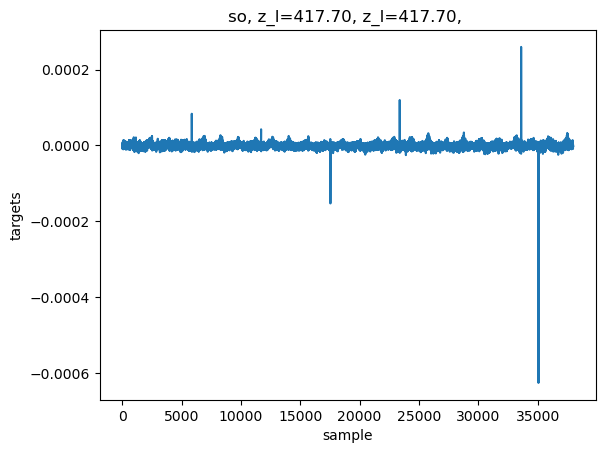

In [13]:
channel_diff_mean.plot()
if iz_l is not None:
    title += f"z_l={std_diff.z_l[iz_l]:.2f}, "
plt.title(title)
plt.show()

In [14]:
# norm of the differences
channel_diff_norm = np.linalg.norm(channel_diff, axis=(1,2))

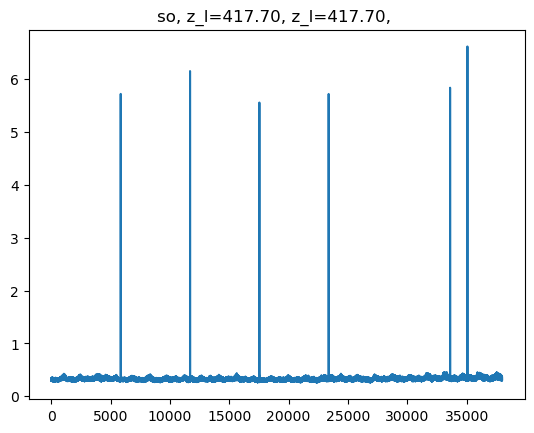

In [15]:
plt.plot(channel_diff_norm)
plt.title(title)
plt.show()

In [16]:
# normalize the channel differences
stddiff = std_diff[variable]
if iz_l is not None:
    stddiff = stddiff.isel(z_l=iz_l)
    
normalized_channel_diff = channel_diff/stddiff

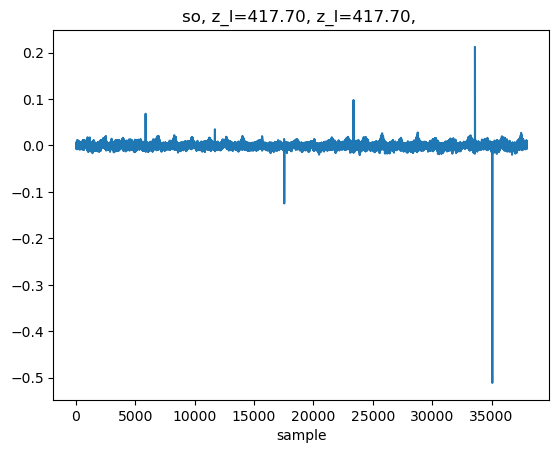

In [17]:
normalized_channel_diff.mean(("lat","lon")).plot()
plt.title(title)
#plt.savefig(f"figures/diffs_{variable}_z_l-{std_diff.z_l[iz_l]:.2f}_spatial_mean_normalized.png", dpi=300)
plt.show()

In [18]:
threshold = 0.05
awry_samples = normalized_channel_diff[abs(normalized_channel_diff.mean(("lat","lon")).values)>threshold]
awry_samples

<xarray.DataArray (sample: 10, lat: 192, lon: 384)> Size: 6MB
dask.array<getitem, shape=(10, 192, 384), dtype=float64, chunksize=(10, 192, 384), chunktype=numpy.ndarray>
Coordinates:
    channels  int64 8B 12
  * lat       (lat) float64 2kB 89.82 88.89 87.95 87.01 ... -87.25 -88.18 -89.12
  * lon       (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * sample    (sample) int64 80B 5861 17541 17542 23377 ... 35065 35066 35069
    z_l       float64 8B 417.7

In [19]:
awry_samples.sample

<xarray.DataArray 'sample' (sample: 10)> Size: 80B
array([ 5861, 17541, 17542, 23377, 23378, 33605, 33606, 35065, 35066, 35069])
Coordinates:
    channels  int64 8B 12
  * sample    (sample) int64 80B 5861 17541 17542 23377 ... 35065 35066 35069
    z_l       float64 8B 417.7

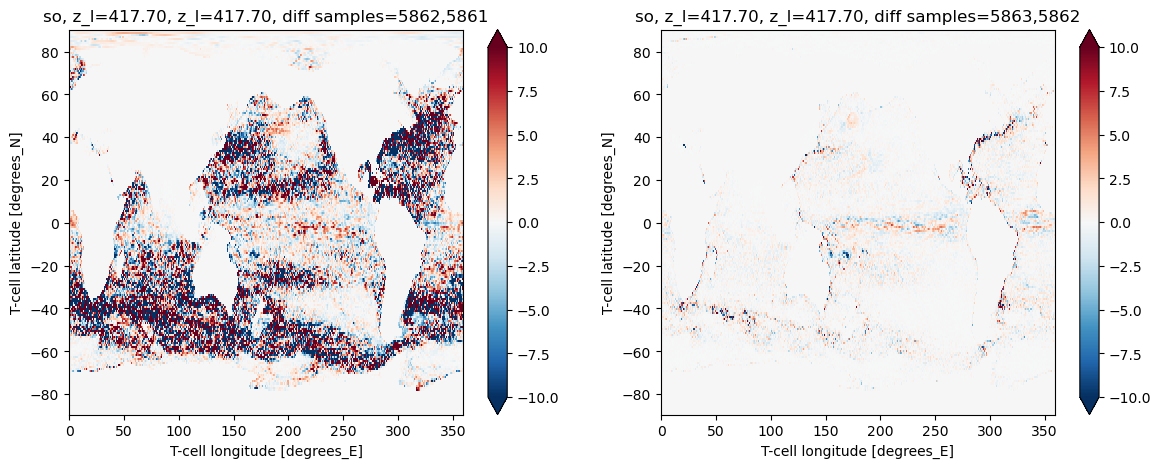

In [20]:
isample = awry_samples.sample[0]
channel_diff_1 = (targets.targets.isel(channels=channel, sample=isample+1) - targets.targets.isel(channels=channel, sample=isample))/stddiff
channel_diff_2 = (targets.targets.isel(channels=channel, sample=isample+2) - targets.targets.isel(channels=channel, sample=isample+1))/stddiff

fig, ax = plt.subplots(1, 2, figsize=(14,5))
channel_diff_1.plot(ax=ax[0], vmin=-10, vmax=10, cmap="RdBu_r")
channel_diff_2.plot(ax=ax[1], vmin=-10, vmax=10, cmap="RdBu_r")

ax[0].set_title(title+f"diff samples={isample.values+1},{isample.values}")
ax[1].set_title(title+f"diff samples={isample.values+2},{isample.values+1}")

#plt.savefig(f"figures/bad_samples_example_{variable}_z_l-{std_diff.z_l[iz_l]:.2f}_normalized.png", dpi=300)
plt.show()

In [30]:
# channel mean in space
channel_mean = targets.targets.isel(channels=channel).mean(dim=("lat","lon")).compute()

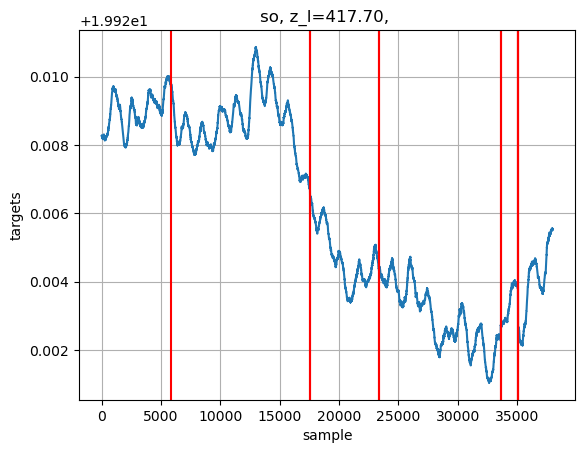

In [31]:
channel_mean.plot()
for i in awry_samples.sample.values:
    plt.axvline(x=i, color="r")
plt.grid()
plt.title(title)
#plt.savefig(f"figures/{variable}_z_l-{std_diff.z_l[iz_l]:.2f}_spatial_mean.png", dpi=300)
plt.show()

### Using replay

In [13]:
channel_gcs_diff = ocn_gcs[variable].sel(z_l=std_diff.z_l[iz_l].values, method="nearest").diff(dim="time")

In [14]:
channel_gcs_diff_squared = channel_gcs_diff**2
channel_gcs_diff_norm = channel_gcs_diff_squared.sum(("lat","lon")).compute()

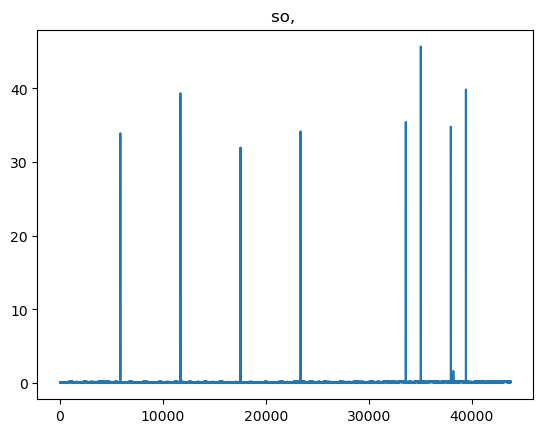

In [15]:
plt.plot(channel_gcs_diff_norm)
plt.title(title)
plt.show()

In [16]:
threshold = 2
replay_awry_samples = channel_gcs_diff_norm[channel_gcs_diff_norm>threshold]

In [18]:
replay_awry_samples.time

<xarray.DataArray 'time' (time: 16)> Size: 128B
array(['1998-01-05T12:00:00.000000000', '1998-01-05T18:00:00.000000000',
       '2002-01-04T12:00:00.000000000', '2002-01-04T18:00:00.000000000',
       '2006-01-03T12:00:00.000000000', '2006-01-03T18:00:00.000000000',
       '2010-01-01T12:00:00.000000000', '2010-01-01T18:00:00.000000000',
       '2017-01-01T12:00:00.000000000', '2017-01-01T18:00:00.000000000',
       '2018-01-01T12:00:00.000000000', '2018-01-01T18:00:00.000000000',
       '2020-01-01T12:00:00.000000000', '2020-01-01T18:00:00.000000000',
       '2021-01-01T12:00:00.000000000', '2021-01-01T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    cftime   (time) object 128B 1998-01-05 12:00:00 ... 2021-01-01 18:00:00
    ftime    (time) timedelta64[ns] 128B -1 days +18:00:00 ... -1 days +18:00:00
  * time     (time) datetime64[ns] 128B 1998-01-05T12:00:00 ... 2021-01-01T18...
    z_l      float64 8B 413.0
Attributes:
    axis:       T
    long_name:  time

### anomaly

In [41]:
# plot the global mean of the anomaly
channel = 22
channel_mean = targets.targets.isel(channels=channel).mean(dim="sample").compute()

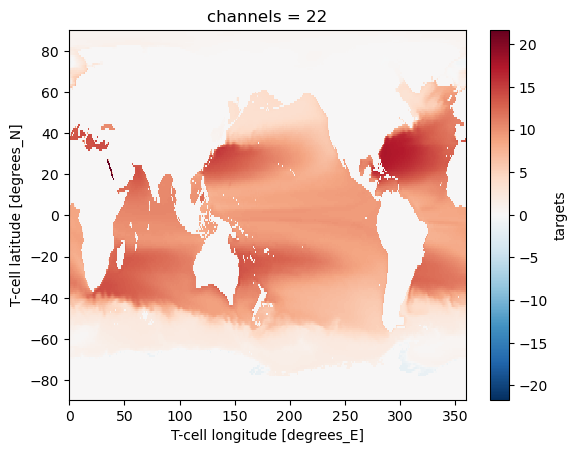

In [42]:
channel_mean.plot()
plt.show()

In [43]:
channel_spatial_mean = targets.targets.isel(channels=channel).mean(dim=("lat","lon")).compute()

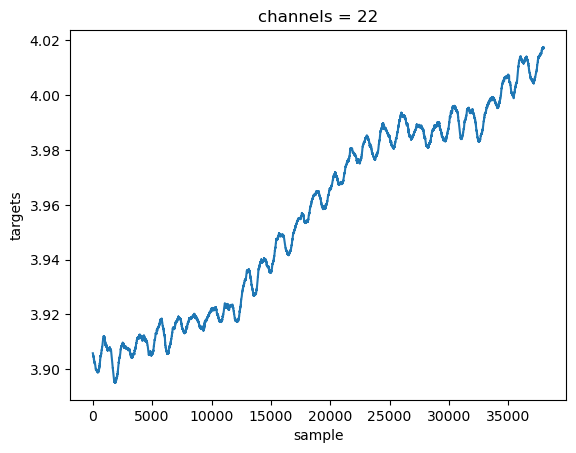

In [44]:
channel_spatial_mean.plot()
plt.show()

In [45]:
channel_anomaly = targets.targets.isel(channels=channel) - channel_mean
channel_anomaly_mean = channel_anomaly.mean(dim=("lat","lon")).compute()

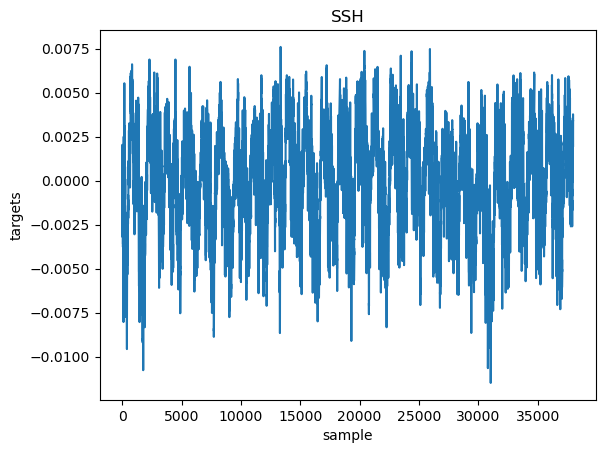

In [72]:
channel_anomaly_mean.plot()
varname = tmeta_tar[channel]["varname"]
title = f"{varname}"
figname = f"figures/training_targets_{varname}_mean_anomaly_time_series.png"

if "z_l" in tmeta_tar[channel]:
    z_l = tmeta_tar[channel]["z_l"]
    title += f", z_l={z_l}"
    figname = f"figures/training_targets_{varname}_z_l-{z_l}_mean_anomaly_time_series.png"

plt.title(title)
#plt.savefig(figname, dpi=300)
plt.show()